<center><h1>The Battle of Cities: Tbilisi vs Berlin</h1></center>

_Beka Modebadze 2019 - https://github.com/bexxmodd/Coursera_Capstone_

<h3>Table of contents</h3>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#1. Introduction">Introduction</a></li>
        <li><a href="#2. Data">Data</a></li>
        <li><a href="#3. Nightlife Data Analysis">Nightlife Data Analysis</a></li>
        <li><a href="#4. Hotels Data Analysis">Hotels Data Analysis</a></li>
        <li><a href="#5. Maps">Maps</a></li>
        <li><a href="#6. Other Statistics">Other Statistics</a></li>
        <li><a href="#7. Discussion">Discussion</a></li>
    </ol>
</div>
<br>
<hr>

## 1. Introduction

### 1.1 Background

Tbilisi, the capital of post-soviet country Georgia, one of the oldest cities which was rediscovered by the world in recent years. For the past 10 years, the whole country is experiencing immense growth in tourism and its especially noticeable in Tbilisi. People come here to experience the natural beauty of Caucasus mountains or, the greenness of the forests and the wildlife preserved there, or simply enjoy summer on the beaches of the Adjara region. However, Tbilisi became popular for its night clubs, bars, and restaurants. As time goes by Tbilisi is attaining its reputation for mesmerizing nightlife and raving culture. In several articles Forbes, The Guardian and VICE pronounced Tbilisi as the center of the nightlife, putting him in from of such huge cities like Berlin and London. Last year Forbes called Tbilisi “This Year's Most Exciting City”[1] and it’s only beginning. 


On the other side of the story, we have Berlin, which has a well-established reputation and has worldwide popularity due to its outstanding night clubs and bars and the experience the city can give to the peoples who are into nightlife. Since the fall of the berlin wall, this city converted itself as the benchmark city for clubbing and nightlife. However, the growth of Tbilisi’s, later conversations and the increase in demand for the Georgian DJ’s around the globe brought me to a question, is Tbilisi in competition with Berlin for the best nightlife city? Does Tbilisi compare to Berlin in terms of night clubs and bars, and if it’s worth it tapping into that business?

### 1.2 Approach

To elaborate better on this topic, we need to dive into the culture and investigate important metrics which I will address in the next paragraph. To experience nightlife fully, especially in the foreign city, just having a good night club is not enough, it’s a combination of other venues, services and freedom of expression. The Guardian in their article about Tbilisi said that “These cities share the magic ingredients that allowed clubbing to thrive in east Berlin: cheap rents, plenty of space, often in the form of unused communist-era buildings, and creative, open-minded young people”[2]. We’ll look at the combination of factors like taxi services, hotels, a measure of personal freedom and crime rates in combination with the number of clubs and bars and their average reviews and how easy it is to travel to Tbilisi.


### 1.3 Methodolody

We will be looking at multiple indicators and the distribution of indicators side by side for two cities; Tbilisi and Berlin. Based on the visual and empirical analysis we will try to draw a picture of how respectable venues in those cities are and find similarities and dissimilarities. We will use density distribution and histogram to visualize how ratings and number of reviews are distributed. We will look at the clustered map to analyze how convenient hotels and venues are located for the visitors. And finally, we will compare trends in tourism, taxi fares and crime rates to evaluate how attractive those cities can be for people looking for an amazing nightlife experience.

-------
## 2. Data:

### 2.1 Main Data Collection

I used foursquare API to collect the top 25 venues from Tbilisi, Georgia, and Berlin, Germany searchable under the category “Night Life” and "Night Clubs." Using the same portal and the same technics I collected the top 25 venues searchable under the category "Hotel." Process of the initial data extraction using python notebook can be found [here](https://github.com/bexxmodd/Coursera_Capstone/blob/master/Tbilis-berlin-data-collection.ipynb)


### 2.2 Complementary Data

After initial scraping and cleaning the data for top 25 hotels and nightlife venues, I extracted average ratings of the venues with the total number of feedbacks for each venue to analyze the reputation and the impressions and of the visitors. Data is mergec with additional columns for 'categories', 'longitude' and 'latitute' which was used for clustering and mapping.
* Rating was chosen as a measure of quality - how well does it satisfy customers and how well does it matches expectations.
* Overall number of reviews was chose as a measure of how many people have been visiting place and how reputable venue of choice has been compared to other places

### 2.3 Other Indices

To portrey full picture I obtained information about foregn tourists visiting Tbilisi and Berlin for last four years. Direct data for Tbilisi visitors is not available to I have to obtain data for last 4 years, I extracted total number of international visitors in Georgia from Wikipedia page[3] and calculated Tbilisi's share based on GNTA database information. GNTA showed that registered 27.1% of the accommotaion units in Tbilisi, thus I used 27% of the total number of visitors as to analyze tourists in Tbilisi.

For Berlin it was relatively easy to accomplish as the explicit data is avaiable with number of foreign visitors who staied in Berlin for past four years on statista.com webpage[4]


### 2.4 Taxi Fares

I used numebo.com to extract and compare taxi fares in Tbilis[5] and Berlin[6]. Data was extracted in current $US and was pasted in csv file while I cleaned and reaorganized in a manned that was plottable on the bar chart for the comparisons how taxi prices different for the start, 1 km and 1 hour wait. Data contains average, minimum, and maximum values.


### 2.5 Crime/Safety Index

For the represantation of the crime and safety I also used numbeo.com[7] for its crime/safety index. Several indices where used for this part. Three indices represent the measure of the safety. ranging from 0 to 100 and higher the score safer that area is. The crime indices are also measured from 0 to 100, but lower the score better the situation is in that area. The full details about crime and it's indices is present in crime/safety comparison section



In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Folium installed
Libraries imported.


--------
## 3. Nightlife Data Analysis

### 3.1 First we import the data for Tbilisi clubs which consists of 25 samples:

In [2]:
# let's import data for Tbilisi clubs
dftbc = pd.read_csv('tbilisi-clubs.csv')
dftbc.head()

,city,name,categories,rating,total,lat,lng
0,Tbilisi,Bassiani,Nightclub,8.9,174,41.722853,44.791265
1,Tbilisi,Cocktail Factory,Cocktail Bar,8.9,22,41.708046,44.779971
2,Tbilisi,Bauhaus,Bar,8.4,45,41.701192,44.803416
3,Tbilisi,8000 Vintages,Wine Bar,9.0,19,41.708375,44.758914
4,Tbilisi,Dadi Wine Bar and Shop,Wine Bar,8.9,137,41.692802,44.801873


We take a look at the top 5 rated venues:

In [3]:
dftbc.nlargest(5,'rating')

,city,name,categories,rating,total,lat,lng
3,Tbilisi,8000 Vintages,Wine Bar,9.0,19,41.708375,44.758914
5,Tbilisi,41° Cocktail Bar,Cocktail Bar,9.0,20,41.690538,44.800432
0,Tbilisi,Bassiani,Nightclub,8.9,174,41.722853,44.791265
1,Tbilisi,Cocktail Factory,Cocktail Bar,8.9,22,41.708046,44.779971
4,Tbilisi,Dadi Wine Bar and Shop,Wine Bar,8.9,137,41.692802,44.801873


We take a look at the top 5 venues with total number of reviews:

In [4]:
dftbc.nlargest(5,'total')

,city,name,categories,rating,total,lat,lng
22,Tbilisi,Cafe Gallery,Nightclub,7.8,459,41.701944,44.791695
18,Tbilisi,Funicular Bar,Cocktail Bar,8.1,244,41.695364,44.786632
17,Tbilisi,Warszawa,Bar,8.1,243,41.695068,44.801587
6,Tbilisi,Mtkvarze,Nightclub,8.4,200,41.722439,44.783404
19,Tbilisi,g.Vino Underground,Wine Bar,8.3,194,41.690957,44.800773


We describe our data to check for highest rating, lowest rating, and average rating; for highest number of reviews, lowest number of reviews, and average number of reviews

In [5]:
dftbc[['rating', 'total']].describe()

,rating,total
count,25.000000,25.000000
mean,8.276000,112.960000
std,0.453946,105.599274
min,7.500000,8.000000
25%,8.100000,24.000000
50%,8.300000,81.000000
75%,8.600000,174.000000
max,9.000000,459.000000


### 3.2 Next we import the data for Berlin clubs which consists of 25 samples:

In [6]:
# let's import data for Berlin clubs
dfbrc = pd.read_csv('berlin-clubs.csv')
dfbrc.head()

,city,name,categories,rating,total,lat,lng
0,Berlin,Herr Lindemann,Cocktail,9.2,62,52.474208,13.444775
1,Berlin,Freya Fuchs,Bar,9.2,118,52.542072,13.357267
2,Berlin,Muted Horn,Beer Bar,9.2,219,52.480726,13.426297
3,Berlin,Etc:Bar,Bar,8.6,69,52.534360,13.421016
4,Berlin,Berghain,Nightclub,8.9,2296,52.511390,13.443164


We take a look at the top 5 rated venues:

In [7]:
dfbrc.nlargest(5,'rating')

,city,name,categories,rating,total,lat,lng
18,Berlin,Baden im Wein,Wine Bar,9.4,62,52.537878,13.411933
5,Berlin,Klunkerkranich,Beer Garden,9.3,2039,52.482099,13.430891
16,Berlin,Lerchen und Eulen,Bar,9.3,664,52.502030,13.430366
0,Berlin,Herr Lindemann,Cocktail,9.2,62,52.474208,13.444775
1,Berlin,Freya Fuchs,Bar,9.2,118,52.542072,13.357267


We take a look at the top 5 venues with total number of reviews:

In [8]:
dfbrc.nlargest(5,'total')

,city,name,categories,rating,total,lat,lng
4,Berlin,Berghain,Nightclub,8.9,2296,52.511390,13.443164
5,Berlin,Klunkerkranich,Beer Garden,9.3,2039,52.482099,13.430891
15,Berlin,Monkey Bar,Cocktail,8.8,1942,52.505599,13.337249
14,Berlin,Hopfenreich,Beer Bar,8.8,828,52.499659,13.439357
23,Berlin,Salon zur wilden Renate,Nightclub,8.7,828,52.497368,13.465226


We describe our data to check for highest rating, lowest rating, and average rating; for highest number of reviews, lowest number of reviews, and average number of reviews

In [9]:
# describe our data
dfbrc[['rating', 'total']].describe()

,rating,total
count,25.000000,25.00000
mean,8.868000,518.96000
std,0.318486,643.54911
min,8.300000,62.00000
25%,8.600000,121.00000
50%,8.800000,218.00000
75%,9.200000,664.00000
max,9.400000,2296.00000


In Tbilisi the highest rated venues are 8000 Vintages and 41° Cocktail Bar, but their total number of reviews is relatively low thus the 4th best venue with 8.9 rating and 174 reviews can be considered as one of the most popular places for the nighttime fun. The lowest scoring place in the top 25 was with a 7.5 rating and the one with a minimum number of reviews with 8.

In Berlin, the highest rating was 9.2 and except ‘Muted Horn’ which is the beer bar, none had the significant number of reviews relative to other venues in the top 25 list. Berghain appears to be the most popular with 2286 reviews and 5th in rating. Worth noting that lowest-scoring venue in Berlin was with 8.3 and lowest number of feedbacks 62


### 3.3 Density and Histogram (Nightlife)

Now we take a look on how our ratings and number of feedbacks are distributed in two cities and how they compare to each other

In [10]:
# We import matplotlib libraries
import matplotlib as mpl 
import matplotlib.pyplot as plt
print('Matplotlib imported!')

Matplotlib imported!


We plot density distribution and histogram graphs

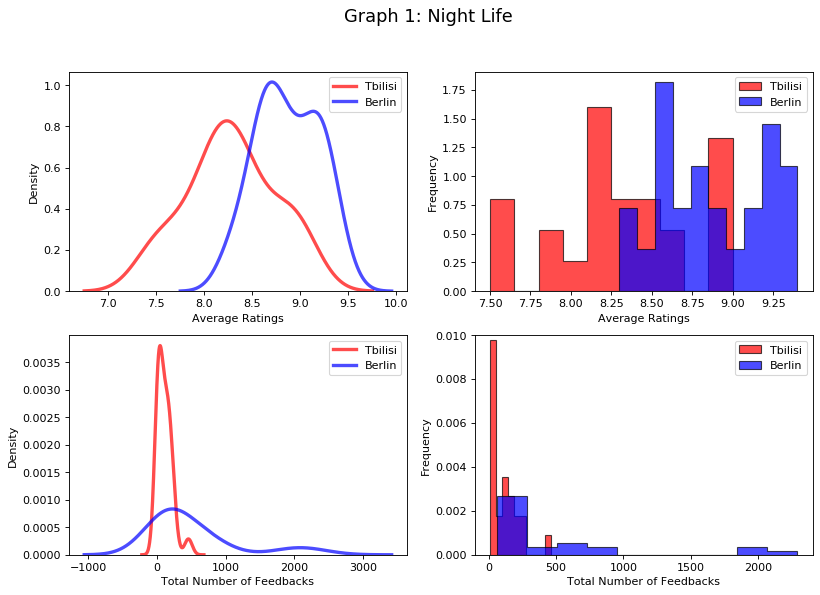

In [11]:
plt.figure(figsize=(12, 8), dpi=80)
kwargs = dict(histtype='stepfilled', alpha=0.7, density=True, ec="k")
plt.suptitle('Graph 1: Night Life', fontsize=16)
labels='Tbilisi','Berlin'

plt.subplot(2,2,1)
dftbc['rating'].plot(kind='density', linewidth=3, color='red', alpha=.7)
dfbrc['rating'].plot(kind='density', linewidth=3, color='blue', alpha=.7)
plt.xlabel('Average Ratings')
plt.legend(labels)
plt.ylim(0,)
plt.subplot(2,2,2)
dftbc['rating'].plot(kind='hist', color='red', **kwargs)
dfbrc['rating'].plot(kind='hist', color='blue', **kwargs)
plt.legend(labels)
plt.xlabel('Average Ratings')

plt.subplot(2,2,3)
dftbc['total'].plot(kind='density', linewidth=3, color='red', alpha=.7)
dfbrc['total'].plot(kind='density', linewidth=3, color='blue', alpha=.7)
plt.xlabel('Total Number of Feedbacks')
plt.legend(labels)
plt.ylim(0,)
plt.subplot(2,2,4)
dftbc['total'].plot(kind='hist', color='red', **kwargs)
dfbrc['total'].plot(kind='hist', color='blue', **kwargs)
plt.legend(labels)
plt.ylim(0,.01)
plt.xlabel('Total Number of Feedbacks')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

plt.savefig('graph1.png')
plt.show()

### 3.4 Relationship between rating and total reviews
We draw scatter graph for each city ceparately to find correlation between rating and number of feedbakcs

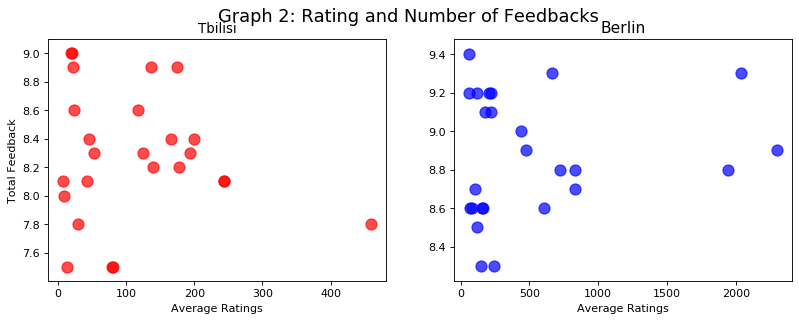

In [43]:
plt.figure(figsize=(12, 4), dpi=80)
plt.suptitle('Graph 2: Rating and Number of Feedbacks', fontsize=16)

plt.subplot(1,2,1)
plt.scatter(dftbc['total'], dftbc['rating'], marker='o', s=100, color='red', alpha=.7)
plt.xlabel('Average Ratings')
plt.ylabel('Total Feedback')
plt.title('Tbilisi', fontsize=12)

plt.subplot(1,2,2)
plt.scatter(dfbrc['total'], dfbrc['rating'], marker='o', s=100, color='blue', alpha=.7)
plt.xlabel('Average Ratings')
plt.title('Berlin', fontsize=14)

plt.savefig('graph2.png')
plt.show()

### 3.5 Results

When we look at the distribution of ratings and number of reviews it is apparent that overall top venues have better ratings and more people have reviewed them in Berlin. This is expected as Berlin has been in the center of the nightlife for a long time and Tbilisi is just came into the picture and starting to step up its reputation. Worth noting that ratings for Tbilisi venues are more spread but the total number of reviews for each venue are closely concentrated in a small sector, which can mean that there is substation difference in the quality of venues even within the top 25 locations. However, we have the opposite picture in Berlin. The ratings are comparably concentrated, and a number of feedbacks are spread widely. This means that well trusted places are present more frequently in Berlin no matter how many people it can accommodate and how many people review them after.

If we’d like to make any assumptions, we would assume that when the number of reviews will increase average rating should become close to the natural rating, and as in general business when the number of customers increases, it is expected that the quality of service will decrease slightly. We can use average rating as the measure of quality and when we look at the scatter graphs there nothing which will confirm that with the increase in the number of reviews ratings decrease. In Tbilisi, they are distributed in a manner of a horizontal line, while in Berlin there even is a small indication of a positive slope - meaning ratings increasing with the increase in the number of reviews. Of course, sample size and the given data are not enough to make final conclusions but at the same time, there is no indication of ratings dropping as more people visit venues, thus if more people visit Tbilisi for its night clubs we should not expect lowering their ratings.

Overall ratings in both cities are satisfactory high and even though Tbilisi is substantially behind from Berlin in terms of the number of tourists per year (which will see in section 6.1) venues in Tbilisi still managed to accumulate a noticeable amount of reviews, with very good or great ratings.

--------
## 4. Hotel Data Analysis

### 4.1 First we import the data for Tbilisi hotels which consists of 25 samples:
We We take a look at the top 5 rated hotels:

In [13]:
# let's import data for tbilisi hotels
dftbh = pd.read_csv('tbilisi-hotels.csv')
dftbh.nlargest(5, 'rating')

,city,name,categories,rating,total,lat,lng
4,Tbilisi,Shota @ Rustaveli Boutique Hotel,Hotel,9.5,56,41.696672,44.797108
1,Tbilisi,Rooms Hotel Tbilisi,Hotel,9.3,569,41.705597,44.786763
5,Tbilisi,Stamba Hotel,Hotel,9.3,78,41.705340,44.787449
0,Tbilisi,Radisson Blu Iveria Hotel,Hotel,9.1,459,41.704703,44.793540
6,Tbilisi,Vinotel,Hotel,9.1,96,41.698013,44.809348


We take a look at the top 5 hotels with total number of reviews:

In [14]:
dftbh.nlargest(5, 'total')

,city,name,categories,rating,total,lat,lng
1,Tbilisi,Rooms Hotel Tbilisi,Hotel,9.3,569,41.705597,44.786763
2,Tbilisi,Holiday Inn Tbilisi,Hotel,8.9,463,41.719105,44.777424
0,Tbilisi,Radisson Blu Iveria Hotel,Hotel,9.1,459,41.704703,44.793540
10,Tbilisi,Tbilisi Marriott Hotel,Hotel,8.5,205,41.699249,44.796920
16,Tbilisi,The Biltmore Hotel Tbilisi,Hotel,8.1,137,41.702198,44.794397


We describe our data to check for highest rating, lowest rating, and average rating; for highest number of reviews, lowest number of reviews, and average number of reviews

In [15]:
dftbh[['rating', 'total']].describe()

,rating,total
count,25.00000,25.000000
mean,8.58800,118.280000
std,0.44189,151.919803
min,8.00000,11.000000
25%,8.20000,26.000000
50%,8.50000,66.000000
75%,9.00000,129.000000
max,9.50000,569.000000


### 4.2 Next we import the data for Berlin hotels which consists of 25 samples:
We We take a look at the top 5 rated hotels:

In [16]:
# let's import data for Berlin clubs
dfbrh = pd.read_csv('berlin-hotels.csv')
dfbrh.nlargest(5, 'rating')

,city,name,categories,rating,total,lat,lng
2,Berlin,Das Stue,Hotel,9.4,230,52.509703,13.345545
0,Berlin,Michelberger Hotel,Hotel,9.3,754,52.504730,13.447533
1,Berlin,25hours Hotel Bikini Berlin,Hotel,9.3,335,52.505691,13.337917
9,Berlin,Hotel Zoo,Hotel,9.3,192,52.503974,13.329216
11,Berlin,Hotel am Steinplatz,Hotel,9.2,88,52.507994,13.327032


We take a look at the top 5 hotels with total number of reviews:

In [17]:
dfbrh.nlargest(5, 'total')

,city,name,categories,rating,total,lat,lng
22,Berlin,Soho House,Hotel,8.8,1201,52.528464,13.415202
0,Berlin,Michelberger Hotel,Hotel,9.3,754,52.504730,13.447533
8,Berlin,Hotel Adlon Kempinski Berlin,Hotel,8.9,541,52.515960,13.380057
3,Berlin,"The Ritz-Carlton, Berlin",Hotel,9.0,470,52.510170,13.375443
15,Berlin,InterContinental Berlin,Hotel,8.6,462,52.507201,13.345315


We describe our data to check for highest rating, lowest rating, and average rating; for highest number of reviews, lowest number of reviews, and average number of reviews

In [18]:
dfbrh[['rating', 'total']].describe()

,rating,total
count,25.000000,25.000000
mean,8.936000,290.400000
std,0.241316,253.134681
min,8.500000,73.000000
25%,8.800000,119.000000
50%,8.900000,198.000000
75%,9.100000,361.000000
max,9.400000,1201.000000


### 4.3 Density and Histogram (Hotels)

Now we take a look on how our ratings and number of feedbacks are distributed in two cities and how they compare to each other

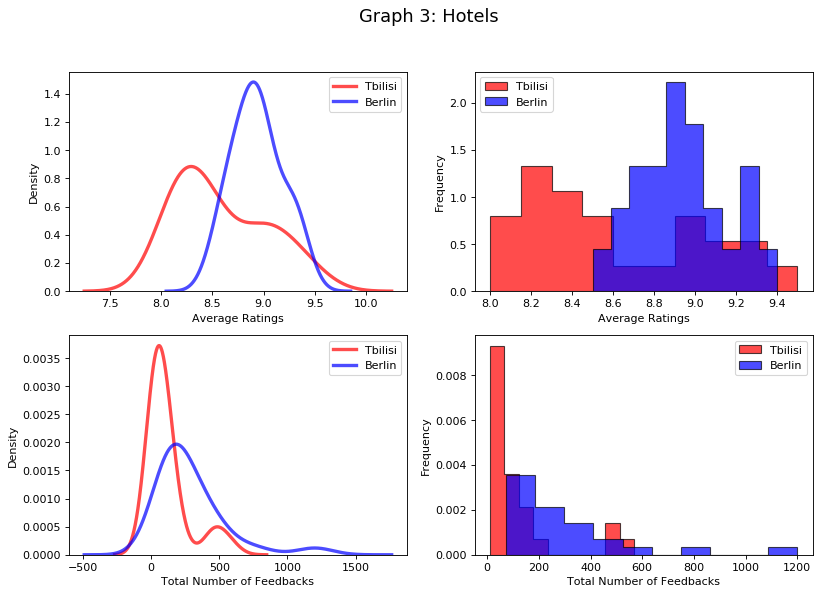

In [19]:
plt.figure(figsize=(12, 8), dpi=80)
kwargs = dict(histtype='stepfilled', alpha=0.7, density=True, ec="k")
plt.suptitle('Graph 3: Hotels', fontsize=16)
labels='Tbilisi','Berlin'

plt.subplot(2,2,1)
dftbh['rating'].plot(kind='density', linewidth=3, color='red', alpha=.7)
dfbrh['rating'].plot(kind='density', linewidth=3, color='blue', alpha=.7)
plt.xlabel('Average Ratings')
plt.legend(labels)
plt.ylim(0,)
plt.subplot(2,2,2)
dftbh['rating'].plot(kind='hist', color='red', **kwargs)
dfbrh['rating'].plot(kind='hist', color='blue', **kwargs)
plt.legend(labels)
plt.xlabel('Average Ratings')

plt.subplot(2,2,3)
dftbh['total'].plot(kind='density', linewidth=3, color='red', alpha=.7)
dfbrh['total'].plot(kind='density', linewidth=3, color='blue', alpha=.7)
plt.xlabel('Total Number of Feedbacks')
plt.legend(labels)
plt.ylim(0,)
plt.subplot(2,2,4)
dftbh['total'].plot(kind='hist', color='red', **kwargs)
dfbrh['total'].plot(kind='hist', color='blue', **kwargs)
plt.legend(labels)
plt.ylim(0,)
plt.xlabel('Total Number of Feedbacks')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

plt.savefig('graph3.png')
plt.show()

### 4.4 Relationship between rating and total reviews
We draw scatter graph for each city ceparately to find correlation between rating and number of feedbakcs

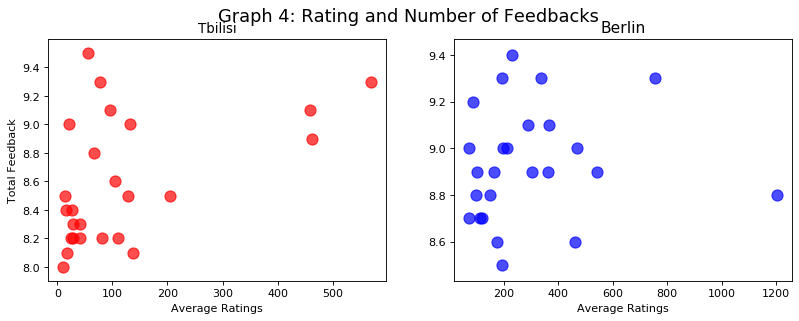

In [44]:
plt.figure(figsize=(12, 4), dpi=80)
plt.suptitle('Graph 4: Rating and Number of Feedbacks', fontsize=16)

plt.subplot(1,2,1)
plt.scatter(dftbh['total'], dftbh['rating'], marker='o', s=100, color='red', alpha=.7)
plt.xlabel('Average Ratings')
plt.ylabel('Total Feedback')
plt.title('Tbilisi', fontsize=12)

plt.subplot(1,2,2)
plt.scatter(dfbrh['total'], dfbrh['rating'], marker='o', s=100, color='blue', alpha=.7)
plt.xlabel('Average Ratings')
plt.title('Berlin', fontsize=14)

plt.savefig('graph4.png')
plt.show()

### 4.5 Results

Hotels are distributed in a similar manner, but in this case, for Tbilisi, the number of reviews is not as densely concentrated but is spread a little bit more. For Berlin distribution of ratings in tighter than it was for venues. 

The histogram shows that a bigger portion or ratings are in a range of 8 to 8.6 in Tbilisi and 8.5 to 9.3 in Berlin. We can say that in terms of Hotels Tbilisi closer to berlin for ratings and number of reviews than it is in terms of venues. This can be explained by the fact that hotels attract a variety of customers who travel for different purposes and their expectations for a pleasant stay are relatively simple than the expectations when visiting a club or a bar and expecting to have a good time. Simple stating there are way more variables involved for the experience to be positive in venues than in hotels where you look for cleanness, quietness, and pleasant personnel.

Looking at a scatter graph for Tbilisi it even shows that the hotels with one of the biggest number of reviews also have relatively high ratings. The positive slope will give an optimistic expectation that with the increase in visitors quality will not decrease.

Comparable high ratings and number of reviews suggest that in both cities you will be able to find an easily good stay. When we examined the names of the hotels, we saw some international hotels present that, which means expected quality will be similar in those instances. Long story short, hotels will complement positive experiences found in the venues in both cities.


-----
## 5. Maps

### 5.1 Map of Tbilisi
We start by importing json and geopy libraries

In [21]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


Libraries imported.


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


We combine data for clubs and hotels to map them together

In [22]:
df1 = [dftbc, dftbh]
tbilisi = pd.concat(df1)
tbilisi.head()

,city,name,categories,rating,total,lat,lng
0,Tbilisi,Bassiani,Nightclub,8.9,174,41.722853,44.791265
1,Tbilisi,Cocktail Factory,Cocktail Bar,8.9,22,41.708046,44.779971
2,Tbilisi,Bauhaus,Bar,8.4,45,41.701192,44.803416
3,Tbilisi,8000 Vintages,Wine Bar,9.0,19,41.708375,44.758914
4,Tbilisi,Dadi Wine Bar and Shop,Wine Bar,8.9,137,41.692802,44.801873


We check for number of <code>categories</code> so later we can assigne cluster number to this categorical values

In [23]:
tbilisi["categories"].value_counts()

Hotel           25
Nightclub        8
Bar              6
Cocktail Bar     4
Wine Bar         4
Pub              1
Dive Bar         1
Lounge           1
Name: categories, dtype: int64

We substitute categorical values of column <code>categories</code> with integers for clustering

In [24]:
cleanup = {"categories": {"Hotel": 0, "Nightclub": 1, "Bar": 2, "Wine Bar": 3,
                                  "Cocktail Bar": 4, "Lounge": 5, "Pub":5, "Dive Bar":5 }}
tbilisi.replace(cleanup, inplace=True)
tbilisi.head()

,city,name,categories,rating,total,lat,lng
0,Tbilisi,Bassiani,1,8.9,174,41.722853,44.791265
1,Tbilisi,Cocktail Factory,4,8.9,22,41.708046,44.779971
2,Tbilisi,Bauhaus,2,8.4,45,41.701192,44.803416
3,Tbilisi,8000 Vintages,3,9.0,19,41.708375,44.758914
4,Tbilisi,Dadi Wine Bar and Shop,3,8.9,137,41.692802,44.801873


We obtain central geograpical coordinates of Tbilisi

In [25]:
address = 'Tbilisi, Georgia'

geolocator = Nominatim(user_agent="tb_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Tbilisi, Georgia are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Tbilisi, Georgia are 41.6934591, 44.8014495.


We create folium map with 6 clusters collor coded
* Red - <code>Hotels</code>
* Yellow - <code>Nightclub</code>
* Green - <code>Bar</code>
* Cyan - <code>Wine Bar</code>
* Pink - <code>Cocktail Bar</code>
* Blue - <code>Pub, Lounge, Dive Bar</code>

In [26]:
# number of clusters based on number of categories
kclusters = 6

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.gist_rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cluster in zip(tbilisi['lat'], tbilisi['lng'], tbilisi['categories']):
    label = folium.Popup(' categories ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color='white',
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.85).add_to(map_clusters)
       
map_clusters

### 5.2 Map of Berlin
We start by combining dataframes of hotels and clubs

In [27]:
df2 = [dfbrc, dfbrh]
berlin = pd.concat(df2)
berlin.head()

,city,name,categories,rating,total,lat,lng
0,Berlin,Herr Lindemann,Cocktail,9.2,62,52.474208,13.444775
1,Berlin,Freya Fuchs,Bar,9.2,118,52.542072,13.357267
2,Berlin,Muted Horn,Beer Bar,9.2,219,52.480726,13.426297
3,Berlin,Etc:Bar,Bar,8.6,69,52.534360,13.421016
4,Berlin,Berghain,Nightclub,8.9,2296,52.511390,13.443164


We check for number of <code>categories</code> so later we can assigne cluster number to this categorical values

In [28]:
berlin["categories"].value_counts()

Hotel          25
Nightclub       8
Bar             5
Cocktail        4
Beer Bar        3
Wine Bar        2
Beer Garden     2
Pub             1
Name: categories, dtype: int64

In [29]:
cleanup = {"categories": {"Hotel": 0, "Nightclub": 1, "Bar": 2, "Beer Bar": 3,
                                  "Cocktail": 4, "Beer Garden": 3, "Pub":5, "Wine Bar":5 }}
berlin.replace(cleanup, inplace=True)
berlin.head()

,city,name,categories,rating,total,lat,lng
0,Berlin,Herr Lindemann,4,9.2,62,52.474208,13.444775
1,Berlin,Freya Fuchs,2,9.2,118,52.542072,13.357267
2,Berlin,Muted Horn,3,9.2,219,52.480726,13.426297
3,Berlin,Etc:Bar,2,8.6,69,52.534360,13.421016
4,Berlin,Berghain,1,8.9,2296,52.511390,13.443164


In [30]:
address = 'Berlin, Germany'

geolocator = Nominatim(user_agent="br_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Berlin, Germany are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Berlin, Germany are 52.5170365, 13.3888599.


We create folium map with 6 clusters collor coded
* Red - <code>Hotels</code>
* Yellow - <code>Nightclub</code>
* Green - <code>Bar</code>
* Cyan - <code>Cocktail</code>
* Pink - <code>Wine Bar, Pub</code>
* Blue - <code>Beer Garden</code>

In [31]:
kclusters = 6

# create map
map_clusters1 = folium.Map(location=[latitude, longitude], zoom_start=12.3)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.gist_rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cluster in zip(berlin['lat'], berlin['lng'], berlin['categories']):
    label = folium.Popup(' categories ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color='white',
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.85).add_to(map_clusters1)
       
map_clusters1

### 5.3 Results

Here is some good news for Tbilisi. When looking at the map we see that the majority of top venues and hotels are located close to the central area and they are located close to each other. We can state that their locations are intertwined with close clusters. This can be a great advantage for the visitors. Not only tourists can save time and money on transportation costs when moving from one spot to another, but this will also allow for better walks and enjoyment of cultural treasures the city can offer. Perfect setup for clubbing, resting, and sightseeing.

While in Berlin you have nearly all the hotels separated from the top venues and clustered together in the west part of the city when main nightclubs are located on the other side (eastern) part of Berlin. Even other types of venues are a bit far from the center and especially from where best hotels are. This arrangement in Berlin combined with heavy traffic and taxi fares give Tbilisi a massive advantage that can be a conclusive to many visitors.

------
## 6. Other Statistics

### 6.1 International visitors from 2014 to 2018
We import the csv file and set first row as index and first column as header

In [32]:
tourism = pd.read_csv('tourism-mil.csv',header=0, index_col=0)
tourism.head()

,2015,2016,2017,2018
city,,,,
Tbilisi,1.60,1.72,2.14,2.35
Berlin,4.86,5.04,5.10,5.40


We use function <code>transpose</code> to revert data which will be easier to plot as a bar chart

In [33]:
tourism = tourism.transpose()
tourism.head()

city,Tbilisi,Berlin
2015,1.60,4.86
2016,1.72,5.04
2017,2.14,5.10
2018,2.35,5.40


We plot the bar graph for each year with Tbilisi and Berlin side by side for a better comparison in the number of visitors

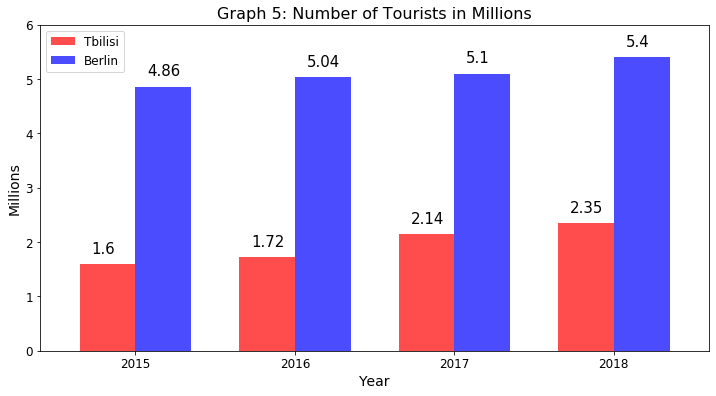

In [34]:
# draw a bar graph to compare prices
ax = tourism.plot(kind='bar', color=['red','blue'], figsize=(12, 6), width=.7, rot=0,
                  tick_label=True, fontsize=12, alpha=.7)

ax.set_ylim(0, 6)
ax.set_ylabel('Millions', fontsize=14)
ax.set_xlabel('Year', fontsize=14)
ax.set_title('Graph 5: Number of Tourists in Millions', fontsize=16)
ax.legend(loc=2, prop={'size': 12})

# annotate value labels to each country
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.075, i.get_height()+.2, \
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)

### 6.2 Taxi Rates
*_This is an estimated fare. The actual fare might differ due to time of the day, tolls, works (available routes), different car companies, error in collecting prices and other human or software error._


We import the csv file and set first row as index and first column as header

In [35]:
taxi = pd.read_csv('taxi-prices.csv', header=0, index_col=0)
taxi.head()

,start avg,start min,start max,1km avg,1km min,1km max,1hour waiting avg,1hour waiting min,1hour waiting max
city,,,,,,,,,
Tbilisi,1.05,0.70,1.40,0.24,0.17,0.35,1.75,1.68,3.50
Berlin,4.37,3.81,4.48,2.24,2.24,3.36,33.62,33.62,36.03


We use function <code>transpose</code> to revert data which will be easier to plot as a bar chart

In [36]:
taxi = taxi.transpose()
taxi.head()

city,Tbilisi,Berlin
start avg,1.05,4.37
start min,0.70,3.81
start max,1.40,4.48
1km avg,0.24,2.24
1km min,0.17,2.24


We plot the bar graph for each year with Tbilisi and Berlin side by side for a better comparison in the number of visitors

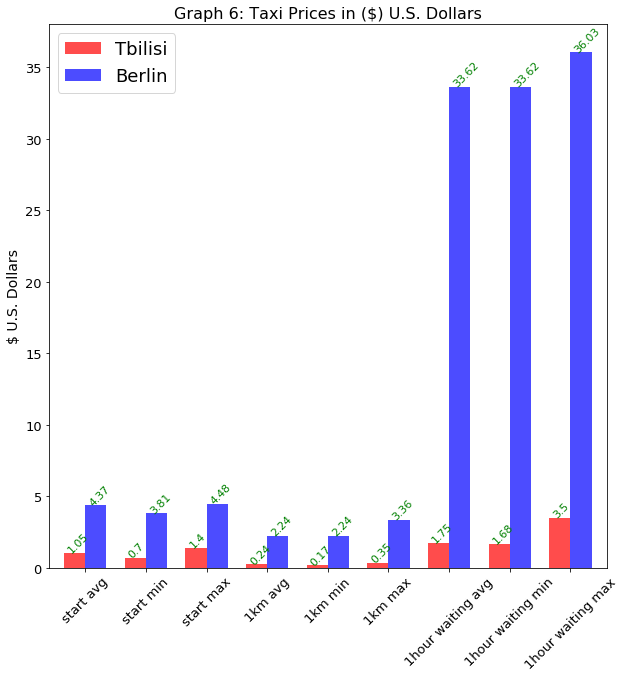

In [37]:
# draw a bar graph to compare prices
ax = taxi.plot(kind='bar', color=['red','blue'], alpha=.7, figsize=(10, 10), width=.7, rot=45, tick_label=True, fontsize=13)
ax.set_ylim(0,38)
ax.set_ylabel('$ U.S. Dollars', fontsize=14)
ax.set_title('Graph 6: Taxi Prices in ($) U.S. Dollars', fontsize=16)
ax.legend(loc=2, prop={'size': 18})

# annotate value labels to each country
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=11, color='green',
                rotation=45)

### 6.3 Crime Rates

* This section is based on surveys from visitors of this website. Questions for these surveys are similar to many similar scientific and government surveys.

* Each entry in the survey is saved as the number in the range [-2, +2], with -2 having meaning of strongly negative and +2 meaning of strongly positive.

* We filter surveys to eliminate potential spam, like people entering a large amount of data which are differentiating from the median value.

* To present survey result, we use the scale [0, 100] for values since it is easier to read for users.

* To generate a current index (which is always updated) we use data up to 36 months old. We include only cities for which there are at least a certain number of contributors. Our semiannual index is remade twice per year by pushing current index into this historical view.

* Crime Index is an estimation of overall level of crime in a given city or a country. We consider crime levels lower than 20 as very low, crime levels between 20 and 40 as being low, crime levels between 40 and 60 as being moderate, crime levels between 60 and 80 as being high and finally crime levels higher than 80 as being very high.

* Safety index is, on the other way, quite opposite of crime index. If the city has a high safety index, it is considered very safe.


We start by importing the csv file and examining it

In [38]:
crime = pd.read_csv('crime-index.csv', header=0, index_col=0)
crime

,Tbilisi,Berlin
index,,
Crime Index,20.55,40.77
Safety Index,79.45,59.23
level of crime,15.69,41.52
Worries being mugged or robbed,15.33,37.98
Worries attacked,18.45,39.24
"Attack because of your skin colour, ethnic origin or religion",20.78,30.73
Violent crimes such as assault and armed robbery,16.69,36.02
Safety walking alone - night,74.42,54.46
Safety walking alone during - day,88.31,78.40


**We separate out dataset into parts: one with the safety ratings (Higher-better!) and crime ratings(Lower-better!)**

In [39]:
safety = crime.loc[['Safety Index','Safety walking alone - night','Safety walking alone during - day']]
safety

,Tbilisi,Berlin
index,,
Safety Index,79.45,59.23
Safety walking alone - night,74.42,54.46
Safety walking alone during - day,88.31,78.40


In [40]:
worry = crime.loc[['Crime Index','level of crime','Worries being mugged or robbed','Worries attacked','Worries attacked',
                   'Attack because of your skin colour, ethnic origin or religion','Violent crimes such as assault and armed robbery']]
worry

,Tbilisi,Berlin
index,,
Crime Index,20.55,40.77
level of crime,15.69,41.52
Worries being mugged or robbed,15.33,37.98
Worries attacked,18.45,39.24
Worries attacked,18.45,39.24
"Attack because of your skin colour, ethnic origin or religion",20.78,30.73
Violent crimes such as assault and armed robbery,16.69,36.02


First we plot Safety Index graph

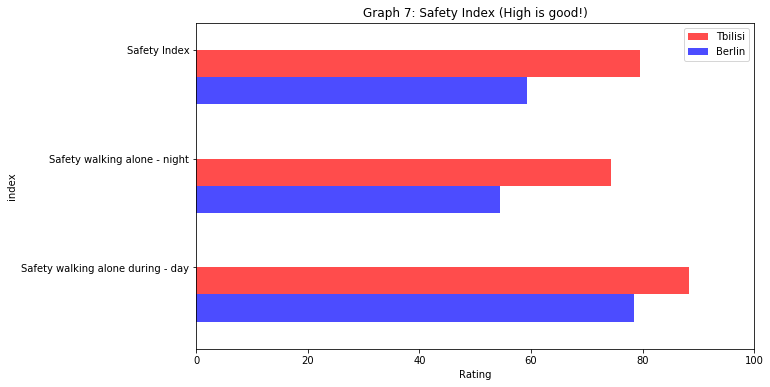

In [41]:
ax = safety.plot(kind='barh', color=['red','blue'], align='edge', alpha=.7, figsize=(10, 6))
plt.title('Graph 7: Safety Index (High is good!)')
plt.xlim(0, 100)
plt.xlabel('Rating')
plt.gca().invert_yaxis()

Now, we plot crime index graph

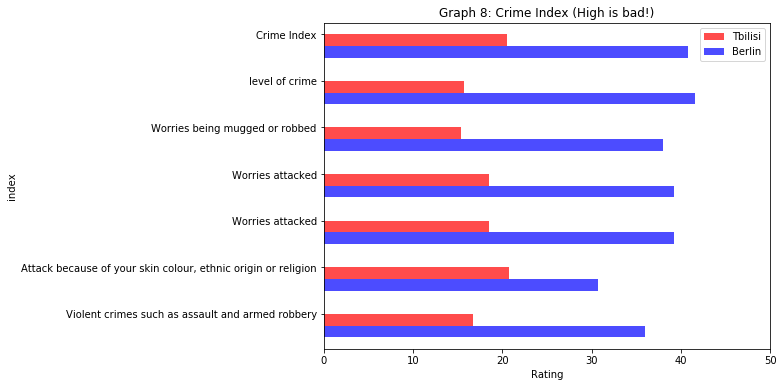

In [42]:
worry.plot(kind='barh', color=['red','blue'], align='edge', alpha=.7, figsize=(8, 6))
plt.title('Graph 8: Crime Index (High is bad!)')
plt.xlim(0, 50)
plt.xlabel('Rating')
plt.gca().invert_yaxis()

----
## 7. Discussion

The number of international visitors shows that while Berlin is still hosting more people, the growth trend is bigger in Tbilisi at a constant rate. Taxi fares are so cheap in Tbilisi that I will not even bother comparing findings as you can check them on your own in Graph 6. What is more important for people loving to spend a night in a foreign city is that the crime rate is relatively low in Tbilisi. Especially it appears to be less dangerous for people of color, homosexuals and different religions (Graph 8). This is a big plus for world travelers. Overall safety during the nighttime is stronger, which is the index we will concentrate as clubbing is about spending the night at the venues and then going home or at the hotel (Graph 7).

Of course, Berlin is on top of the world for the nightlife, however, we see Tbilisi is getting closer with high-quality venues and top-notch hotels. Service is more affordable in Tbilisi. Taxi fares are beyond comparable. Taxi in Tbilisi can get you where you want cheaper than it will cost you to travel by bus or metro in Berlin. That’s why every year more and more people are choosing to choose Tbilisi to spend their vacations or to attend massive parties in BASSIANI or other night clubs. The market for the night entertainment is booming in Tbilisi and there is no sign that it will slow down in the near future.

If an opportunity arises, I would definitely recommend exploring Tbilisi’s nightlife and even I would go saying to invest in it as it will make substantial returns as Tbilisi has the potential to establish as one of the top tourists' destination.

------
<center><i>Reference:</i></center>

[1] Wilson, B. (2019, September 25). Berlin Is Out, Tbilisi Is In: Georgia's Capital Is This Year's Most Exciting City. Retrieved from https://www.forbes.com/sites/breannawilson/2018/09/05/berlin-is-out-tbilisi-is-in-georgias-capital-is-this-years-most-exciting-city/#435a0d80479d.

[2] Ravens, C. (2019, January 22). Bassiani: the Tbilisi techno mecca shaking off post-Soviet repression. Retrieved from https://www.theguardian.com/music/2019/jan/22/bassiani-tbilisi-techno-nightclub-georgia.

[3] Koptyug, E. (2019, November 6). Tourism Berlin: arrivals by origin 2018. Retrieved from https://www.statista.com/statistics/568463/tourism-arrivals-berlin-germany-by-origin/.

[4] Tourism in Georgia (country). (2019, September 26). Retrieved from https://en.wikipedia.org/wiki/Tourism_in_Georgia_(country).

[5] Taxi Fare in Tbilisi. (n.d.). Retrieved from https://www.numbeo.com/taxi-fare/in/Tbilisi?displayCurrency=USD.

[6] Taxi Fare in Berlin. (n.d.). Retrieved from https://www.numbeo.com/taxi-fare/in/Berlin?displayCurrency=USD.

[7] Crime. (n.d.). Retrieved from https://www.numbeo.com/crime/compare_cities.jsp?country1=Germany&country2=Georgia&city1=Berlin&city2=Tbilisi&tracking=getDispatchComparison.

----------

> **Beka Modebadze 2019  [LinkedIn](https://www.linkedin.com/in/bmodebadze/); [Github](https://github.com/bexxmodd)**